<a href="https://colab.research.google.com/github/chmnshrma/Gold-Silver-Price-prediction-/blob/main/prediction_automation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Gold & Silver Price prediction using Arima

In [ ]:
## Switch to GPU mode for faster Computation (Runtime> Change runtime> GPU)

## Importing all the necessary Libraries

In [ ]:
#Necessary libraries = Pandas, matplotlib

#pandas= data Manipulation and analysis
#Arima = Forecasting
#matplotlib= data visualization


In [ ]:
!pip install pmdarima

     |████████████████████████████████| 1.5 MB 12.3 MB/s 
     |████████████████████████████████| 9.5 MB 15.1 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

## Importing the Dataset & Exploring it

In [ ]:
df=pd.read_csv("GS.csv")

In [ ]:
#read_csv function from pandas

In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,313.769601,317.466096,310.345658,314.179362,311.470941,2.898465e+06
std,69.348390,69.812047,68.736568,69.199754,69.905186,1.144842e+06
min,188.979996,190.399994,185.520004,186.119995,182.877487,9.681000e+05
25%,245.194999,245.659996,242.059998,244.414994,241.465912,2.149950e+06
50%,332.070007,335.809998,327.559998,330.850006,328.141907,2.716600e+06
75%,371.354996,373.924988,367.229996,371.334992,369.355255,3.333850e+06
max,419.950012,420.760010,412.720001,419.690002,417.660553,9.876800e+06


In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-09-21,189.899994,194.169998,187.470001,194.000000,190.620224,4871300
1,2020-09-22,194.000000,196.139999,188.429993,191.619995,188.281677,3355800
2,2020-09-23,192.000000,192.919998,185.869995,186.119995,182.877487,3116100
3,2020-09-24,188.979996,197.460007,187.050003,195.110001,191.710876,5114600
4,2020-09-25,192.960007,195.389999,189.610001,194.949997,191.553665,3106000
...,...,...,...,...,...,...,...
246,2021-09-13,407.410004,409.369995,403.799988,409.260010,409.260010,1802800
247,2021-09-14,410.299988,417.010010,402.779999,403.690002,403.690002,3263200
248,2021-09-15,398.000000,403.609985,396.209991,401.950012,401.950012,3199800
249,2021-09-16,404.519989,405.980011,394.890015,396.679993,396.679993,2882900


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


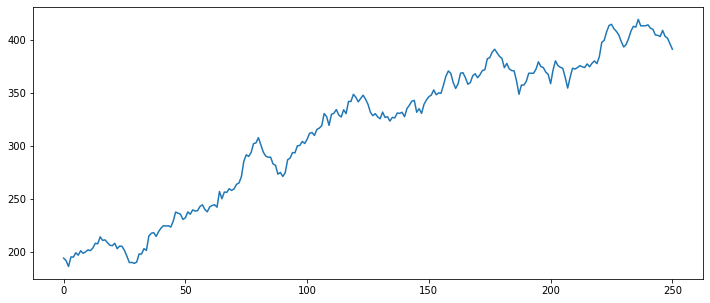

In [ ]:
df['Close'].plot(figsize=(12,5))

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1525.791, Time=0.47 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1520.373, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1521.686, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1521.755, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1524.482, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1523.494, Time=0.15 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.861 seconds


# Understanding Auto Regressive Integrated Moving Average (ARIMA)

#Finding Order (P,D,Q)

In [ ]:
from pmdarima import auto_arima

In [ ]:
df=df.dropna()
best_order=auto_arima(df["Close"],trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1525.791, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1520.373, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1521.686, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1521.755, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1524.482, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1523.494, Time=0.16 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.711 seconds


## Data Preperation-Train Test Split

In [ ]:
columns=["Close"]
df=pd.DataFrame(df,columns=columns)
df


,Close
0,194.000000
1,191.619995
2,186.119995
3,195.110001
4,194.949997
...,...
246,409.260010
247,403.690002
248,401.950012
249,396.679993


In [ ]:
train,test=df[0:int(len(df)*0.85)],df[int(len(df)*0.85):]

In [ ]:
  train.shape,test.shape,df.shape

((213, 1), (38, 1), (251, 1))

## Creating ARIMA Model

In [ ]:
from statsmodels.tsa.arima_model import ARIMA 
model=ARIMA(train,order=(0,1,0))
model=model.fit()
model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                  212
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -645.330
Method:                           css   S.D. of innovations              5.079
Date:                Sun, 19 Sep 2021   AIC                           1294.661
Time:                        15:43:56   BIC                           1301.374
Sample:                             1   HQIC                          1297.374
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8580      0.349      2.460      0.014       0.174       1.542
==============================================================================
"""

## Forecasting

In [ ]:
start=len(train)               ##Example= y1,y2,y3 > y3-y2,y2-y1 (Total elements is 3 but after using Arima its 2 > data- 1 
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
test['Close'].plot(legend=True)

### Error

In [ ]:
## ERROR
from sklearn.metrics import mean_squared_error
from math import sqrt
test.mean()
rmse=sqrt(mean_squared_error(pred,test))
print(rmse)

##More Forecast Graphs

In [ ]:
start=1
end=251
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
test['Close'].plot(legend=True)

In [ ]:
start=1
end=251
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True,color='blue', marker='o', linestyle='dashed',label='Predicted Price')
test['Close'].plot(legend=True,color='red', label='Actual Price')
train['Close'].plot(legend=True,color='green', label='Train data(Historical)')



## 30 days into the future

In [ ]:
### 30 days into the future

start=1
end=281
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True,color='blue', marker='o', linestyle='dashed',label='Predicted Price')
test['Close'].plot(legend=True,color='red', label='Actual Price')
train['Close'].plot(legend=True,color='green', label='Train data(Historical)')

